****
# My goal

- Top Find Top Players from 2008 to 2016
- Top Find Top Teams from 2008 to 2016



# Loading packages and data
****

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import datetime as dt


# Importing the dataset
conn = sqlite3.connect('../input/database.sqlite')

In [ ]:
#Making a Connection for execution of SQL Commands
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#list of all the tables in the schema 
print(cursor.fetchall())

## Creating all the DataFrames from tables present in the DataBase

In [ ]:
#making DataFrame from DataBase
df_league = pd.read_sql_query("select * from League;", conn)
df_league.head()
df_player_attributes = pd.read_sql_query("select * from Player_Attributes;", conn)
df_player = pd.read_sql_query("select * from Player;", conn)
df_match = pd.read_sql_query("select * from Match;", conn)
df_country = pd.read_sql_query("select * from Country;", conn)
df_team_attributes = pd.read_sql_query("select * from Team_Attributes;", conn)
df_team = pd.read_sql_query("select * from Team;", conn)

In [ ]:
#inspecting the Player_Attributes table
df_player_attributes.head(1)

In [ ]:
#inspecting the Player table
df_player.head(1)

In [ ]:
#inspecting the Country table
df_country.head(1)

In [ ]:
#inspecting the Team_Attributes table
df_team_attributes.head(1)

In [ ]:
#inspecting the Team table
df_team.head(1)

In [ ]:
#inspecting the Match table
df_match.head(1)

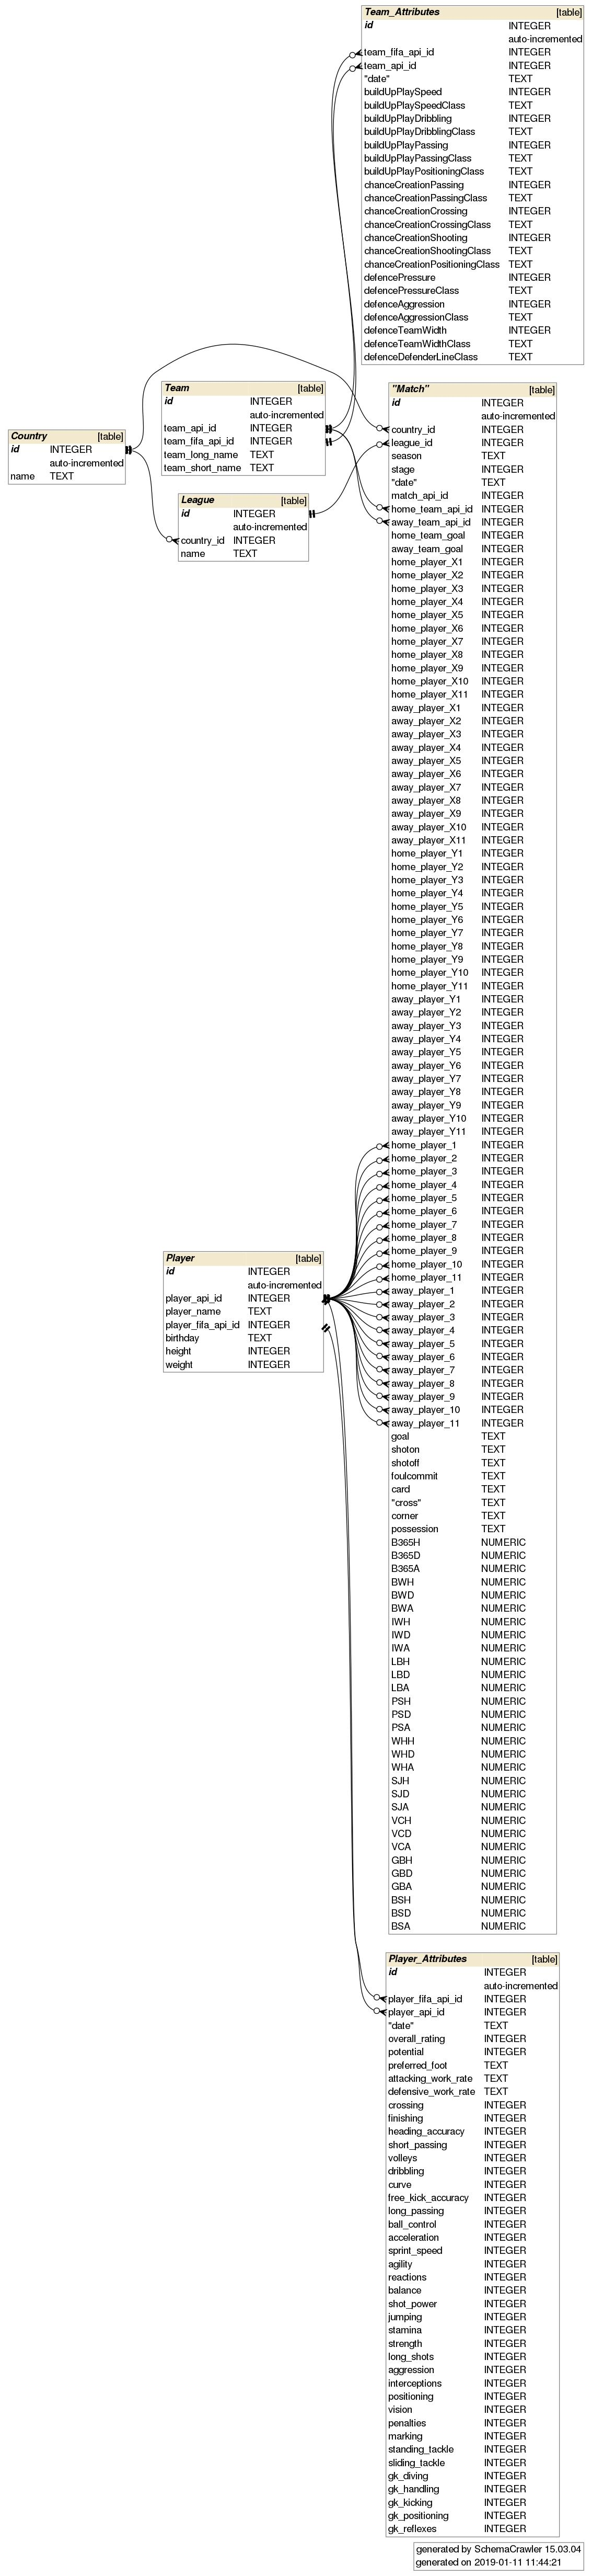

## Checking NULL

In [ ]:
df_match.isna().sum()

In [ ]:
df_team_attributes.isna().sum()

In [ ]:
df_team.isna().sum()

In [ ]:
df_player.isna().sum()

In [ ]:
df_player_attributes.isna().sum()

In [ ]:
df_player.drop('id',inplace=True,axis=1)
df_player.head(1)

In [ ]:
df_player_attributes.drop('id',inplace=True,axis=1)
df_player_attributes.head(1) 

## Combining DataFrames to Have Player Name and Player attributes in a Single Data Frame

In [ ]:
#Merging Two Tables
df_comb_player =  pd.merge(df_player, df_player_attributes, on="player_api_id")
df_comb_player.head(1)

In [ ]:
#dropping the fields which are unnecessary 
df_comb_player = df_comb_player.drop(['player_fifa_api_id_x', 'birthday',
       'height', 'weight', 'player_fifa_api_id_y'],axis=1)

In [ ]:
#converting Object to DateTime 
df_comb_player['date'] = pd.to_datetime(df_comb_player['date'])

# Finding Top Players

In [ ]:
def top_N_players(df,year,n=10):
    """Function which return N Number of Top Player at end of Year"""
    df_top = df[df['date'].dt.year == year]
    df_top = df_top.sort_values('date').groupby('player_api_id').last() #Taking only last Instance
    return df_top.sort_values('overall_rating').tail(n)

In [ ]:
top_N_players(df_comb_player,2016)
df = top_N_players(df_comb_player,2016)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank1"},inplace=True)
df_rank =df 
df

In [ ]:
top_N_players(df_comb_player,2015)
df = top_N_players(df_comb_player,2015)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank2"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2014)
df = top_N_players(df_comb_player,2014)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank3"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2013)
df = top_N_players(df_comb_player,2013)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank4"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2012)
df = top_N_players(df_comb_player,2012)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank5"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2011)
df = top_N_players(df_comb_player,2011)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank6"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2010)
df = top_N_players(df_comb_player,2010)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank7"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2009)
df = top_N_players(df_comb_player,2009)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank8"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2008)
df = top_N_players(df_comb_player,2008)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank9"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
top_N_players(df_comb_player,2007)
df = top_N_players(df_comb_player,2007)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank10"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["player_api_id","player_name"],how='outer')
df

In [ ]:
#Makign a Line Plot of top 15 Players
df_rank.index = df_rank.player_name
#Taking only the rank in consideration
df_rank = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9',
       'rank10']]


In [ ]:
df_rank = df_rank.replace(np.NaN,11)
df_rank["sum_rank"] = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9',
       'rank10']].sum(axis=1)

In [ ]:
df_rank =  df_rank.sort_values('sum_rank').head(15)
df_rank  = df_rank.drop('sum_rank',axis=1)

In [ ]:
#df.pivot(index = "team_long_name")
df1_transposed = df_rank.T

In [ ]:
#df['b'].plot(kind='bar', color='y')
df1_transposed.plot(kind='line',figsize=(15,15), marker='o')
plt.gca().invert_yaxis() #inverting y axis
plt.gca().invert_xaxis() #inverting y axis
plt.yticks(range(1,11))
ind = np.arange(10) 
plt.xticks(ind, ("2016","2015","2014","2013","2012","2011","2010","2009","2008","2007"))
plt.show();


# Finding Top Teams 

## League Teams 

In [ ]:
df_comb_team = pd.merge(df_team, df_team_attributes, on="team_api_id")
df_comb_team.head(1)

In [ ]:
# making the fuction 

In [ ]:
df_comb_team['date'] = pd.to_datetime(df_comb_team['date'])

In [ ]:
df_comb_team_2015 = df_comb_team[df_comb_team['date'].dt.year == 2015]
df_comb_team_2015 = df_comb_team_2015.sort_values('date').groupby('team_api_id').last()

In [ ]:
df_comb_team_2015.head()

In [ ]:

def end_of_year_player(df_comb_player,year):
    df_comb_player['date'] = pd.to_datetime(df_comb_player['date'])
    df_comb_player = df_comb_player[df_comb_player['date'].dt.year == year]
    df_comb_player = df_comb_player.sort_values('date').groupby('player_api_id').last()    
    df_comb_player.reset_index(level=0, inplace=True)
    return df_comb_player[['player_api_id','player_name', 'date', 'overall_rating', 'potential']]


def end_of_year_team(df_comb_team):
    df_comb_team['date'] = pd.to_datetime(df_comb_team['date'])
    df_comb_team = df_comb_team[df_comb_team['date'].dt.year == 2015]
    df_comb_team = df_comb_team.sort_values('date').groupby('team_api_id').last()
    df_comb_team.reset_index(level=0, inplace=True)
    return df_comb_team[['team_api_id','team_long_name','date']]

def team_to_player(df_match,season):
    df_match = df_match[df_match.season== season ]
    players_list_home = ['home_team_api_id','home_player_1', 'home_player_2', 'home_player_3',
   'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
   'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11']
    df_team_to_player = df_match[players_list_home]
    df_team_to_player=df_team_to_player.melt(['home_team_api_id']).sort_values('home_team_api_id')
    df_team_to_player = df_team_to_player[["home_team_api_id","value"]]
    df_team_to_player.rename( columns={"value":"player_api_id", "home_team_api_id":"team_api_id" },inplace=True)
    df_team_to_player = df_team_to_player.drop_duplicates()
    return df_team_to_player
    
    
def top_N_team(df_comb_team,df_comb_player,df_match,season="2015/2016",n=5):
    year = int(season.split("/")[0])
    df_end_of_year_team = end_of_year_team(df_comb_team)
    df_end_of_year_player = end_of_year_player(df_comb_player,year)
    df_team_to_player = team_to_player(df_match,season)
    df_end_of_year_player = pd.merge(df_end_of_year_player, df_team_to_player, on="player_api_id")
    df_comb_player_team_group= df_end_of_year_player.sort_values('overall_rating').groupby('team_api_id').head(15)
    df_comb_player_team_group = df_comb_player_team_group.sort_values('overall_rating').groupby('team_api_id').sum()
    df_top = pd.merge(df_comb_player_team_group,df_end_of_year_team,on="team_api_id")
    df_top = df_top[["team_api_id","overall_rating","team_long_name"]]
    df_top = df_top.sort_values("overall_rating")
    return df_top[-n:]

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2015/2016")
df.index = range(len(df.index),0,-1)
df_rank = df[['team_api_id', 'team_long_name']]
df_rank.reset_index(level=0, inplace=True)
df_rank.rename( columns={"index":"rank1"},inplace=True)
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2014/2015")
df.index = range(len(df.index),0,-1)
df = df[['team_api_id', 'team_long_name']]
#df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"])
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank2"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2013/2014")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
#df_rank = pd.merge(df_rank,df[['team_api_id', 'team_long_name']],on=["team_api_id","team_long_name"])
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank3"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2012/2013")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
#df_rank = pd.merge(df_rank,df[['team_api_id', 'team_long_name']],on=["team_api_id","team_long_name"])
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank4"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2011/2012")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank5"},inplace=True)

df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2010/2011")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank6"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2009/2010")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank7"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2008/2009")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank8"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2008/2009")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank9"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2007/2008")
df = df[['team_api_id', 'team_long_name']]
df.index = range(len(df.index),0,-1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank10"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

In [ ]:
df_rank = df_rank.replace(np.NaN,6)
df_rank.index = df_rank.team_long_name
df_rank = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9',
       'rank10']]

In [ ]:
#df.pivot(index = "team_long_name")
df1_transposed = df_rank.T

In [ ]:
df1_transposed

In [ ]:
df_rank
#df['b'].plot(kind='bar', color='y')
df1_transposed.plot(kind='line',figsize=(15,15), marker='o')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.yticks(range(1,6))
ind = np.arange(10) 
plt.xticks(ind, ("2016","2015","2014","2013","2012","2011","2010","2009","2008","2007"))
plt.show();
